In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import *
from ipywidgets import interact
%matplotlib inline

In [2]:
def getTop(df, column, n=10):
    l = df[column].to_dict().items()
    return sorted(l, key=lambda x : x[-1], reverse=True)[:n]

def getRank(df, column):
        return {k:i for i, (k, v) in enumerate(getTop(df, column, n=None), 1)}

In [3]:
leaders = pd.read_csv('../data/true_leaders.csv')

In [4]:
leaders.head()

,Unnamed: 0,Unnamed: 0.1,ID(alias),ID,Тип лидерства,комментарий
0,0,0,miller3,6182154,транзакционный,"немного трансформационный художник, комменты у..."
1,1,1,es_borisenko,61756961,служитель,"немного трансформационный, фотограф женщина"
2,2,2,ekaterina.kuzovkova,301218,транзакционный,"модель, только свои фото, комменты удалена опция"
3,3,3,id59772761,59772761,трансформационный,"диджей из Белгорода, может трансформационный, ..."
4,4,4,drevid_art,86539724,транзакционный,"парень, фотограф-дизайнер, любит себя"


In [5]:
leaders.shape

(99, 6)

In [6]:
unnamed = leaders.columns[:2].to_list()

In [7]:
del leaders[unnamed[0]], leaders[unnamed[1]]

In [8]:
leaders[leaders['Тип лидерства'].isna()]['комментарий'].to_list()

['лучше исключить, полуголые фото девушки и перепосты группы текстов для песен',
 'девушка-модель, но лайков мало, свои фото..не лидер',
 'закрытый профиль',
 'не лидер, много друзей, но своего контента и идеи нет',
 'с 2017 года нет постов',
 'посты 2017года, модель, группа удалена',
 'профиль не находится',
 'активность 2017 года, свои фото девочки',
 'девушка, только свои секси фото, комментов нет',
 'идеи нет, свои фото девушки, комментов нет, транзакционный или не лидер',
 'фотограф, не ведет vk год',
 'модель, не ведет Vk 2 года',
 'два года не ведет, только о себе и свои фото',
 'только свои фото, Калининград, транзакционный или не лидер',
 'о себе, идеи нет, комменты отключены, позитивно, транзакционный или не лидер',
 'только о себе, нет идеи, комменты тоже',
 'не ведет с 2018г и все о себе, много друзей и подписчиков',
 'редко ведет девушка, только свои фото',
 'политический журналист, служитель, все о народе, хотя комменты тоже не видны',
 'девушка-архитектор, но идеи нет, т

In [9]:
leaders['Тип лидерства'] = leaders['Тип лидерства'].apply(lambda x : 'трансформационный' if x=='транформационный' else x)

In [10]:
leaders.dropna(subset=['Тип лидерства'], inplace=True)

In [11]:
leaders.shape[0]

65

In [12]:
leaders.groupby('Тип лидерства').count().ID.to_frame()

,ID
Тип лидерства,
служитель,16
транзакционный,18
трансформационный,31


## Leaders' features

In [68]:
data = pd.read_csv('./all_features.csv')
data = data.set_index('uid')

data['text_mood'] = data['text_mood'].fillna(value=0.0)
data[['is_nsfw', 'has_smile', 'number_of_faces', 'has_face']] = \
data[['is_nsfw', 'has_smile', 'number_of_faces', 'has_face']].fillna(0.0).astype(int)

data.to_csv('./.all_features.csv', index_label='vk_id')

In [69]:
data.head()

,gender,followers_qty,friends_qty,pagerank_score,eigencentrality_score,hits_in,hits_out,flw_hits_in,flw_hits_out,is_nsfw,has_smile,number_of_faces,has_face,text_mood
uid,,,,,,,,,,,,,,
169,1.0,8621.0,0.0,0.000081,9.750758e-08,6.380952e-09,6.380963e-09,0.000000e+00,5.985958e-08,1,0,1,1,-0.142857
204,1.0,2912.0,240.0,0.000008,2.934387e-09,1.920279e-10,1.920282e-10,1.393409e-10,3.333800e-09,0,1,1,1,0.000000
276,1.0,3023.0,324.0,0.000008,3.314272e-11,2.168891e-12,2.168910e-12,0.000000e+00,1.877361e-54,0,1,1,1,-0.136364
586,2.0,0.0,0.0,0.000015,5.480418e-12,3.586429e-13,3.586450e-13,9.515891e-13,0.000000e+00,0,0,0,0,0.200000
1338,1.0,2878.0,0.0,0.000028,1.026794e-09,6.719400e-11,6.719414e-11,0.000000e+00,7.685454e-09,0,0,0,0,0.195876


In [70]:
data.loc[leaders.ID].dropna(how='all')

,gender,followers_qty,friends_qty,pagerank_score,eigencentrality_score,hits_in,hits_out,flw_hits_in,flw_hits_out,is_nsfw,has_smile,number_of_faces,has_face,text_mood
uid,,,,,,,,,,,,,,
6182154,2.0,1198.0,1761.0,0.000014,2.995837e-09,1.960492e-10,1.960496e-10,0.000000e+00,2.308404e-06,0,0,1,1,0.118644
61756961,1.0,1977.0,7969.0,0.000079,7.636062e-11,4.997106e-12,4.997143e-12,4.951045e-18,0.000000e+00,0,1,1,1,0.375000
301218,1.0,0.0,0.0,0.000018,3.868233e-09,2.531393e-10,2.531396e-10,0.000000e+00,0.000000e+00,1,0,1,1,0.000000
59772761,2.0,448.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,1,1,1,-0.213483
86539724,2.0,202.0,0.0,0.000043,1.004740e-11,6.575125e-13,6.575197e-13,0.000000e+00,0.000000e+00,0,1,1,1,-0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35208371,2.0,7253.0,981.0,0.000028,7.326147e-10,4.794267e-11,4.794269e-11,0.000000e+00,2.690737e-11,0,0,2,1,0.071429
3271005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0.000000
1324639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0.000000


Все лидеры так или иначе есть в нашем датасете. Даже если они скрыли страницы, их аватары скачали и обработали.

In [71]:
leaders_features = data.loc[leaders.ID].dropna(how='all').copy(deep=True)

In [72]:
data['uid'] = data.index
leaders_features = leaders_features.merge(right=leaders[['ID', 'Тип лидерства']], left_on='uid', right_on='ID')
leaders_features = leaders_features.rename(columns={'ID':'uid'})
leaders_features = leaders_features.rename(columns={u"Тип лидерства":'type'})

Удалим тех, по кому нет фич из сетевой модели и простых метрик: числа друзей, подписчиков и гендера.

In [73]:
leaders_features.dropna(how='all', subset=leaders_features.columns[:9].to_list(), inplace=True)

In [74]:
leaders_features.shape

(56, 16)

56/65 людей остались для анализа

In [75]:
leaders_features['gender'] = leaders_features.gender.astype(int)

In [79]:
leaders_features['gender'] = leaders_features['gender'].apply(lambda x : 'female' if x==1 else 'male')

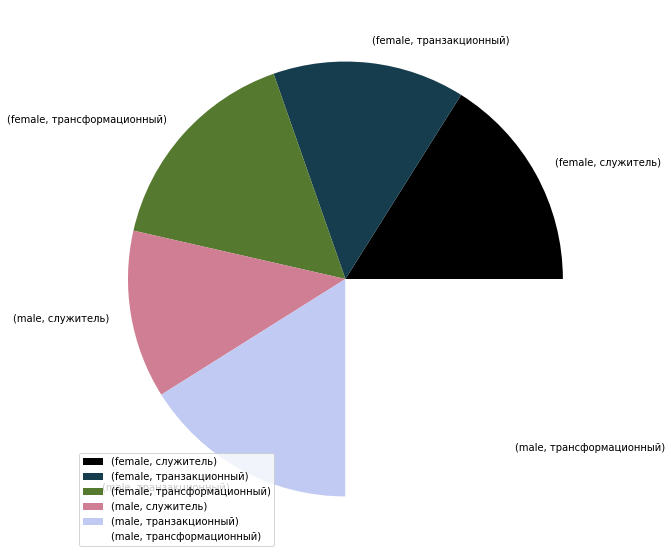

In [105]:
leaders_features.groupby(['gender', 'type']).count()['uid'].to_frame().plot(kind='pie', figsize=(12,10),
                                                                       subplots=True, colormap=plt.cm.cubehelix)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [111]:
feature_mat = leaders_features[leaders_features.columns[1:-2]].values

In [131]:
@interact
def plot_tsne(perplexity=(2, 100, 2), early_exaggeration=(1, 100, 2)):
    tsne = TSNE(n_components=2, perplexity=perplexity, early_exaggeration=early_exaggeration, random_state=42)
    xy = tsne.fit_transform(feature_mat)
    plt.scatter(xy[:, 0], xy[:, 1], cmap=plt.cm.cubehelix_r)
    plt.show()

interactive(children=(IntSlider(value=50, description='perplexity', min=2, step=2), IntSlider(value=49, descri…

In [138]:
print(cosine_distances(feature_mat))

[[0.         0.06207647 0.99945785 ... 0.3317774  0.09650674 0.05356619]
 [0.06207647 0.         0.99985936 ... 0.63129514 0.00393541 0.22431158]
 [0.99945785 0.99985936 0.         ... 0.99976335 0.99924739 0.99989831]
 ...
 [0.3317774  0.63129514 0.99976335 ... 0.         0.7151289  0.12734821]
 [0.09650674 0.00393541 0.99924739 ... 0.7151289  0.         0.28329816]
 [0.05356619 0.22431158 0.99989831 ... 0.12734821 0.28329816 0.        ]]


In [139]:
feature_mat.mean()

347.9143934024283

In [140]:
feature_mat.std()

1690.0500176472403

In [142]:
leaders_features[leaders_features.columns[1:-2]].describe()

,followers_qty,friends_qty,pagerank_score,eigencentrality_score,hits_in,hits_out,flw_hits_in,flw_hits_out,is_nsfw,has_smile,number_of_faces,has_face,text_mood
count,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000
mean,2529.857143,1990.446429,0.000056,1.384161e-07,9.058013e-09,9.058014e-09,4.766495e-09,8.238423e-08,0.035714,0.517857,0.928571,0.892857,0.208487
std,4489.713303,2949.715345,0.000059,5.608745e-07,3.670389e-08,3.670389e-08,1.959614e-08,4.300288e-07,0.187256,0.504203,0.374513,0.312094,0.388706
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.800000
25%,166.000000,0.000000,0.000011,2.966887e-11,1.941548e-12,1.941552e-12,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000
50%,519.000000,0.000000,0.000037,1.509232e-09,9.876505e-11,9.876526e-11,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.139394
75%,2260.500000,4371.750000,0.000078,3.263945e-08,2.135942e-09,2.135943e-09,5.042810e-11,1.675773e-11,0.000000,1.000000,1.000000,1.000000,0.467599
max,18116.000000,9764.000000,0.000253,2.988257e-06,1.955530e-07,1.955530e-07,9.375773e-08,2.308404e-06,1.000000,1.000000,2.000000,1.000000,1.000000


_____________________


In [143]:
feature_mat = leaders_features[leaders_features.columns[3:-2]].values

In [145]:
leaders_features.columns[3:-2]

Index(['pagerank_score', 'eigencentrality_score', 'hits_in', 'hits_out',
       'flw_hits_in', 'flw_hits_out', 'is_nsfw', 'has_smile',
       'number_of_faces', 'has_face', 'text_mood'],
      dtype='object')

In [146]:
@interact
def plot_tsne(perplexity=(2, 100, 2), early_exaggeration=(1, 100, 2)):
    tsne = TSNE(n_components=2, perplexity=perplexity, early_exaggeration=early_exaggeration, random_state=42)
    xy = tsne.fit_transform(feature_mat)
    plt.scatter(xy[:, 0], xy[:, 1], cmap=plt.cm.cubehelix_r)
    plt.show()

interactive(children=(IntSlider(value=50, description='perplexity', min=2, step=2), IntSlider(value=49, descri…

In [154]:
dist = euclidean_distances(feature_mat)
np.fill_diagonal(dist, np.inf)
twins = dist.argmin(axis=1)

In [157]:
feature_mat.max()

2.0

In [158]:
feature_mat.min()

-0.7999999999999999

In [155]:
feature_mat.mean()

0.2348675275451358

In [156]:
feature_mat.std()

0.42974615506210817

In [163]:
friends_ratio = (leaders_features['friends_qty'].astype(float)/leaders_features['followers_qty'].astype(float)).dropna()
len(friends_ratio[friends_ratio!=0])

25

In [164]:
friends_ratio[friends_ratio!=0].describe()

count    25.000000
mean     13.585305
std      22.606769
min       0.061523
25%       2.407407
50%       5.053879
75%      10.979296
max      83.842105
dtype: float64